# Nearest neighbors implementation of particle tracking

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

In [30]:
# # Take in user input for the first set of coordinates (2D)
# coords1 = input("Numbers separated by commas ex: x, y") # Type in coordinates for particle 1
# coords2 = input("Numbers separated by commas ex: x, y") # Type in coordinates for particle 1
# coords3 = input("Numbers separated by commas ex: x, y") # Type in coordinates for particle 1
# coords1, coords2, coords3 = np.array(coords1), np.array(coords2), np.array(coords3)
# print(coords1, coords2, coords3)


# ex = np.array([1,2,3]) # Example coordinates
# print(ex)

# assert isinstance(coords1, np.ndarray), "Object is not a NumPy array"

### Set particles, and positions

In [ ]:
# Generate synthetic data to test on.
np.random.seed(1111)
n_particles = 3
positions_t = np.random.rand(n_particles, 2) * 100 # Frame T, n_particle rows and 2 columns (x,y)

# Attach ID's to a dictionary that tracks particles across frames
# traj = {}
# next_id = 0
# for pos in positions_t:
#     traj[next_id] = [(0, *pos)]
#     next_id += 1
# Dictionary with ID's as key, frame number, then position.

# Second frame
displacement_1 = (2 * np.random.rand(n_particles, 2) - 1) * 5 # Small random displacement for testing purposes. Allow for displacements in x, y, z <= 0 by shifting interval to [1, 1)]
positions_t1 = positions_t + displacement_1

# Third frame
displacement_2 = (2 * np.random.rand(n_particles, 2) - 1) * 5
positions_t2 = positions_t1 + displacement_2

positions_list = [positions_t, positions_t1, positions_t2]

# Note here that we use random displacements (similar to that of Brownian motion) but we can restrict movements linearly as well by changing how we define our displacement. 

### Perform Matching via nearest-neighbors

In [38]:
# Compute distance matrix for a simple case of just the first two frames
dist = distance_matrix(positions_t, positions_t1)
matches = np.argmin(dist, axis=1)

print(dist) 
print(matches)

[[ 3.52717282 63.62280524 69.12491146]
 [69.45540826  2.84461451 38.43161265]
 [71.61714809 35.64159132  3.88421952]]
[0 1 2]


### Visualization

j: 0 and k: 0
j: 1 and k: 1
j: 2 and k: 2
j: 0 and k: 0
j: 1 and k: 1
j: 2 and k: 2


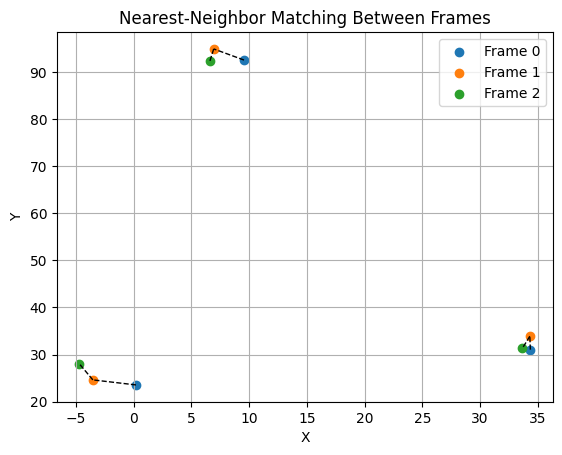

In [ ]:
# Visualization
plt.scatter(*positions_t.T, label = "Frame 0")
plt.scatter(*positions_t1.T, label = "Frame 1")
plt.scatter(*positions_t2.T, label = "Frame 2")


# Draw trajectories

# Example of a simple case (the inner loop). Draws a line between the nearest neighbors identified by distance_matrix and np.argmin. 
# for i, j in enumerate(matches):
#     plt.plot([positions_t[i,0], positions_t1[j,0]], 
#              [positions_t[i,1], positions_t1[j,1]], 
#              'k--', linewidth=1)

for i in range(len(positions_list) - 1):
    dist = distance_matrix(positions_list[i], positions_list[i+1])
    matches = np.argmin(dist, axis = 1)
    for j, k in enumerate(matches):
        print("j: " + str(j) + " and k: " + str(k))
        plt.plot([positions_list[i][j,0], positions_list[i+1][k,0]],
                 [positions_list[i][j,1], positions_list[i+1][k,1]],
                 'k--', linewidth = 1)
        

plt.legend()
plt.title("Nearest-Neighbor Matching Between Frames")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axes
plt.show()



In [ ]:
# Change index position of particles
# Make 3D


# 